#📌 Extracción

In [4]:
import requests
import pandas as pd

In [5]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [6]:
df = pd.json_normalize(data)
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformación

## Verificando la información

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [8]:
df.shape

(7267, 21)

In [9]:
df.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [10]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [11]:
for col in df.columns:
  print(f" Valores unicos en la columna'{col}: {df[col].nunique()}'")

  if df[col].nunique() < 50:
    print(df[col].unique())
    print('-' * 50)

 Valores unicos en la columna'customerID: 7267'
 Valores unicos en la columna'Churn: 3'
['No' 'Yes' '']
--------------------------------------------------
 Valores unicos en la columna'customer.gender: 2'
['Female' 'Male']
--------------------------------------------------
 Valores unicos en la columna'customer.SeniorCitizen: 2'
[0 1]
--------------------------------------------------
 Valores unicos en la columna'customer.Partner: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'customer.Dependents: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'customer.tenure: 73'
 Valores unicos en la columna'phone.PhoneService: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'phone.MultipleLines: 3'
['No' 'Yes' 'No phone service']
--------------------------------------------------
 Valores unicos en la columna'internet.InternetService: 3'
['DSL' 'Fiber o

In [12]:
print("Numero de duplicados", df.duplicated().sum())

Numero de duplicados 0


In [13]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [14]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


## Realizando las Transformaciones

In [15]:
df['account.Charges.Total'] = df['account.Charges.Total'].apply(pd.to_numeric, errors='coerce')
print(df['account.Charges.Total'].dtype)

float64


In [16]:
df = df[df['Churn'].str.strip() != '']
print("Número de filas despues de eliminar los vacios en 'Churn':", len(df))

Número de filas despues de eliminar los vacios en 'Churn': 7043


In [17]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [18]:
df = df.dropna(subset=['account.Charges.Total'])

In [19]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


## Creando la columna de cuentas diarias

In [20]:
df['cuentas_diarias'] = df['account.Charges.Monthly'] / 30
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [21]:
df['cuentas_diarias'].describe()

,cuentas_diarias
count,7032.000000
mean,2.159940
std,1.002866
min,0.608333
25%,1.186250
50%,2.345000
75%,2.995417
max,3.958333


## Estandarización y transformación de datos

In [22]:
columnas = {
    'customerID': 'id',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'tiene +60',
    'customer.Partner': 'posee_pareja',
    'customer.Dependents': 'posee_dependientes',
    'customer.tenure': 'tiempo_contrato',
    'phone.PhoneService': 'servicio_telefono',
    'phone.MultipleLines': 'multiples_lineas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_peliculas',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'factura_digital',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'valor_mensal',
    'account.Charges.Total': 'total_cobrado'
}
df = df.rename(columns= columnas)
df

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [23]:
df['Churn'] = df['Churn'].replace({'No': 'No', 'Yes': 'Sí'})
df['genero'] = df['genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
df['posee_pareja'] = df['posee_pareja'].replace({'Yes': 'Sí', 'No': 'No'})
df['posee_dependientes'] = df['posee_dependientes'].replace({'Yes': 'Sí', 'No': 'No'})
df['servicio_telefono'] = df['servicio_telefono'].replace({'Yes': 'Sí', 'No': 'No'})
df['multiples_lineas'] = df['multiples_lineas'].replace({'No': 'No', 'Yes': 'Sí', 'No phone service': 'Sin servicio de teléfono'})
df['tipo_internet'] = df['tipo_internet'].replace({'No': 'No'})
df['tipo_contrato'] = df['tipo_contrato'].replace({'One year': 'Anual', 'Month-to-month': 'Mensual', 'Two year': 'Bienal'})
df.head()


,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Yes,Yes,No,Anual,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Yes,Mensual,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,Yes,No,No,No,Mensual,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,Yes,No,Yes,Yes,Mensual,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,No,Yes,Yes,No,Mensual,Yes,Mailed check,83.9,267.40,2.796667


In [24]:
columnas_a_traducir = ['seguridad_online', 'backup_online', 'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv', 'streaming_peliculas']
mapeo = {'No': 'No', 'Yes': 'Sí', 'No internet service': 'Sin servicio de internet'}

for col in columnas_a_traducir:
    df[col] = df[col].replace(mapeo)

df.head()

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Anual,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,Sí,No,No,No,Mensual,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,Sí,No,Sí,Sí,Mensual,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,No,Sí,Sí,No,Mensual,Yes,Mailed check,83.9,267.40,2.796667


In [25]:
for col in columnas_a_traducir:
    print(col, ":", df[col].unique())


seguridad_online : ['No' 'Sí' 'Sin servicio de internet']
backup_online : ['Sí' 'No' 'Sin servicio de internet']
proteccion_dispositivo : ['No' 'Sí' 'Sin servicio de internet']
soporte_tecnico : ['Sí' 'No' 'Sin servicio de internet']
streaming_tv : ['Sí' 'No' 'Sin servicio de internet']
streaming_peliculas : ['No' 'Sí' 'Sin servicio de internet']


# #

In [26]:
df['metodo_pago'] = df['metodo_pago'].replace({
    'Mailed check': 'Cheque enviado por correo',
    'Electronic check': 'Cheque electrónico',
    'Credit card (automatic)': 'Tarjeta de crédito (automático)',
    'Bank transfer (automatic)': 'Transferencia bancaria (automática)'
})
df.head()

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Anual,Yes,Cheque enviado por correo,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Cheque enviado por correo,59.9,542.40,1.996667
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,Sí,No,No,No,Mensual,Yes,Cheque electrónico,73.9,280.85,2.463333
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,Sí,No,Sí,Sí,Mensual,Yes,Cheque electrónico,98.0,1237.85,3.266667
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,No,Sí,Sí,No,Mensual,Yes,Cheque enviado por correo,83.9,267.40,2.796667


In [27]:
df['metodo_pago'].unique()


array(['Cheque enviado por correo', 'Cheque electrónico',
       'Tarjeta de crédito (automático)',
       'Transferencia bancaria (automática)'], dtype=object)

#📊 Carga y análisis

## Análisis Descriptivo

In [28]:
df.describe()

,tiene +60,tiempo_contrato,valor_mensal,total_cobrado,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


## Distribución de evasión

### Conteo y porcentaje de Churn

In [29]:
# Conteo absoluto
conteo_churn = df['Churn'].value_counts()
print("Conteo de Churn:")
print(conteo_churn)

# Porcentaje
porcentaje_churn = df['Churn'].value_counts(normalize=True) * 100
print("\nPorcentaje de Churn:")
print(porcentaje_churn)


Conteo de Churn:
Churn
No    5163
Sí    1869
Name: count, dtype: int64

Porcentaje de Churn:
Churn
No    73.421502
Sí    26.578498
Name: proportion, dtype: float64


### Gráfico de barras

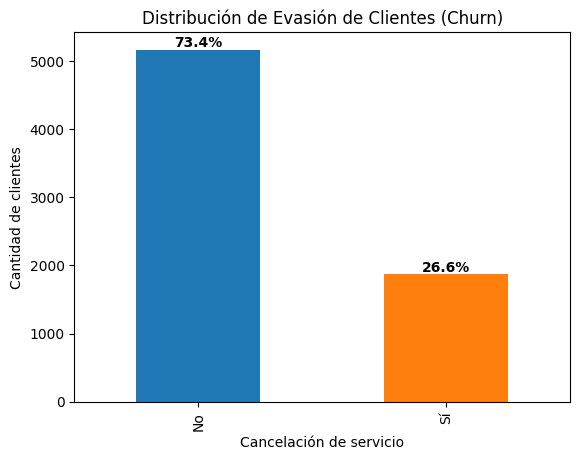

In [30]:
import matplotlib.pyplot as plt

conteo = df['Churn'].value_counts()
porcentaje = df['Churn'].value_counts(normalize=True) * 100
plt.figure()
colores = ['tab:blue', 'tab:orange']
ax = conteo.plot(kind='bar', color=colores)
plt.title('Distribución de Evasión de Clientes (Churn)')
plt.xlabel('Cancelación de servicio')
plt.ylabel('Cantidad de clientes')
for i, v in enumerate(conteo.values):
    pct = porcentaje.iloc[i]
    ax.text(i, v, f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.show()


### Gráfico de pastel

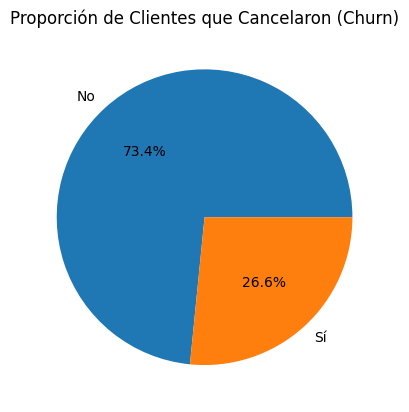

In [31]:
import matplotlib.pyplot as plt

conteo = df['Churn'].value_counts()
labels = conteo.index
plt.figure()
plt.pie(conteo, labels=labels, autopct='%1.1f%%')
plt.title('Proporción de Clientes que Cancelaron (Churn)')
plt.show()


### Recuento de evasión por variables categóricas

In [32]:
pd.crosstab(df['genero'], df['Churn'])


Churn,No,Sí
genero,,
Femenino,2544,939
Masculino,2619,930


In [33]:
pd.crosstab(df['genero'], df['Churn'], normalize='index') * 100


Churn,No,Sí
genero,,
Femenino,73.040482,26.959518
Masculino,73.795435,26.204565


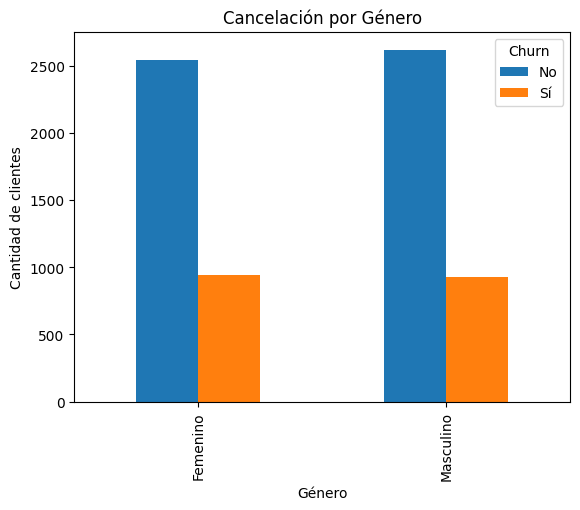

In [34]:
pd.crosstab(df['genero'], df['Churn']).plot(kind='bar')
plt.title('Cancelación por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de clientes')
plt.show()

In [35]:
pd.crosstab(df['tipo_contrato'], df['Churn'])


Churn,No,Sí
tipo_contrato,,
Anual,1306,166
Bienal,1637,48
Mensual,2220,1655


In [36]:
pd.crosstab(df['tipo_contrato'], df['Churn'], normalize='index') * 100


Churn,No,Sí
tipo_contrato,,
Anual,88.722826,11.277174
Bienal,97.151335,2.848665
Mensual,57.290323,42.709677


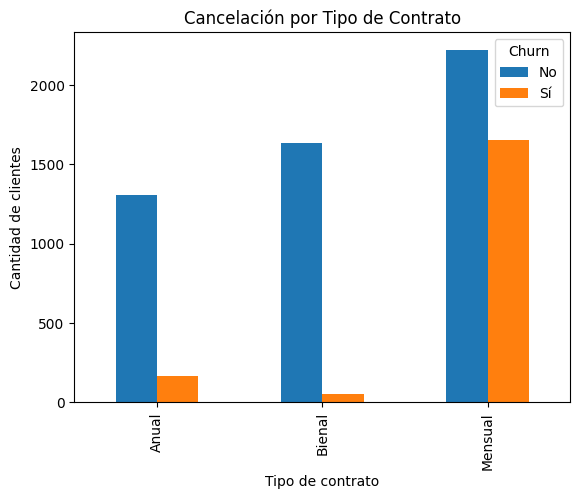

In [37]:
pd.crosstab(df['tipo_contrato'], df['Churn']).plot(kind='bar')
plt.title('Cancelación por Tipo de Contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.show()

In [38]:
pd.crosstab(df['metodo_pago'], df['Churn'])

Churn,No,Sí
metodo_pago,,
Cheque electrónico,1294,1071
Cheque enviado por correo,1296,308
Tarjeta de crédito (automático),1289,232
Transferencia bancaria (automática),1284,258


In [39]:
pd.crosstab(df['metodo_pago'], df['Churn'], normalize='index') * 100


Churn,No,Sí
metodo_pago,,
Cheque electrónico,54.714588,45.285412
Cheque enviado por correo,80.798005,19.201995
Tarjeta de crédito (automático),84.746877,15.253123
Transferencia bancaria (automática),83.268482,16.731518


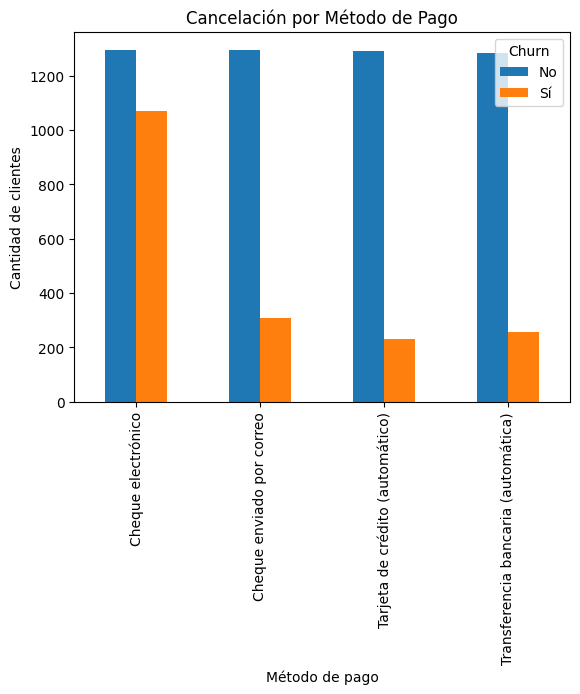

In [40]:
pd.crosstab(df['metodo_pago'], df['Churn']).plot(kind='bar')
plt.title('Cancelación por Método de Pago')
plt.xlabel('Método de pago')
plt.ylabel('Cantidad de clientes')
plt.show()


In [41]:
pd.crosstab(df['tipo_internet'], df['Churn'])

Churn,No,Sí
tipo_internet,,
DSL,1957,459
Fiber optic,1799,1297
No,1407,113


In [42]:
pd.crosstab(df['tipo_internet'], df['Churn'], normalize='index') * 100


Churn,No,Sí
tipo_internet,,
DSL,81.001656,18.998344
Fiber optic,58.107235,41.892765
No,92.565789,7.434211


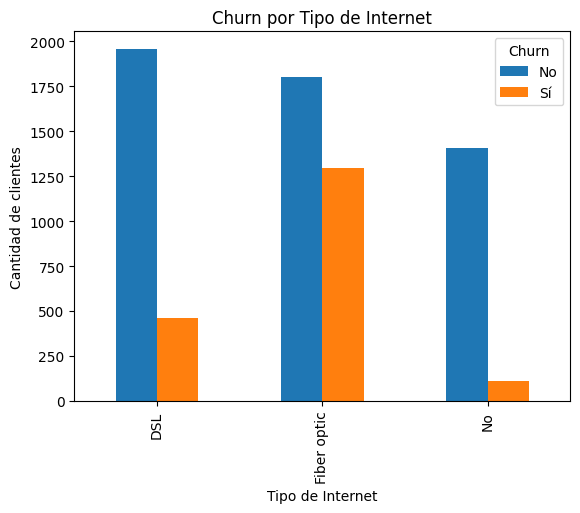

In [43]:
pd.crosstab(df['tipo_internet'], df['Churn']).plot(kind='bar')
plt.title('Churn por Tipo de Internet')
plt.xlabel('Tipo de Internet')
plt.ylabel('Cantidad de clientes')
plt.show()


### Conteo de evasión por variables numéricas

In [44]:
df.groupby('Churn')[['tiempo_contrato', 'valor_mensal', 'total_cobrado', 'cuentas_diarias']].mean()

,tiempo_contrato,valor_mensal,total_cobrado,cuentas_diarias
Churn,,,,
No,37.650010,61.307408,2555.344141,2.043580
Sí,17.979133,74.441332,1531.796094,2.481378


In [45]:
df.groupby('Churn')[['tiempo_contrato', 'valor_mensal', 'total_cobrado', 'cuentas_diarias']].median()


,tiempo_contrato,valor_mensal,total_cobrado,cuentas_diarias
Churn,,,,
No,38.0,64.45,1683.60,2.148333
Sí,10.0,79.65,703.55,2.655000


<Figure size 640x480 with 0 Axes>

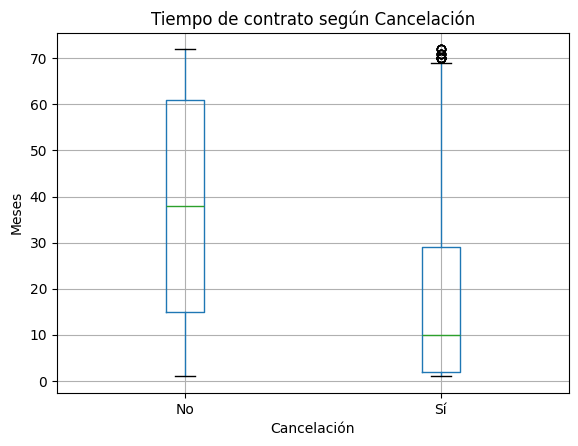

In [46]:
import matplotlib.pyplot as plt

plt.figure()
df.boxplot(column='tiempo_contrato', by='Churn')
plt.title('Tiempo de contrato según Cancelación')
plt.suptitle('')
plt.xlabel('Cancelación')
plt.ylabel('Meses')
plt.show()


<Figure size 640x480 with 0 Axes>

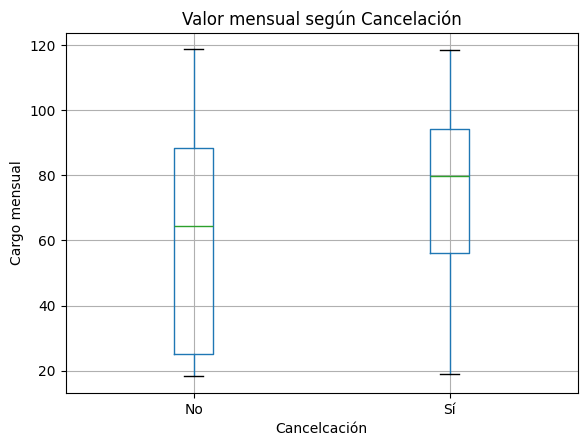

In [47]:
plt.figure()
df.boxplot(column='valor_mensal', by='Churn')
plt.title('Valor mensual según Cancelación')
plt.suptitle('')
plt.xlabel('Cancelcación')
plt.ylabel('Cargo mensual')
plt.show()


<Figure size 640x480 with 0 Axes>

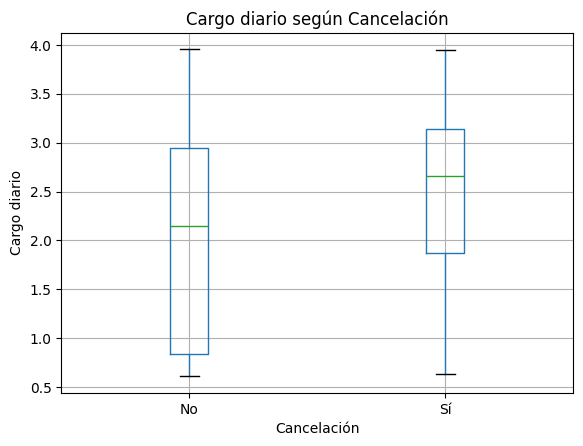

In [48]:
plt.figure()
df.boxplot(column='cuentas_diarias', by='Churn')
plt.title('Cargo diario según Cancelación')
plt.suptitle('')
plt.xlabel('Cancelación')
plt.ylabel('Cargo diario')
plt.show()


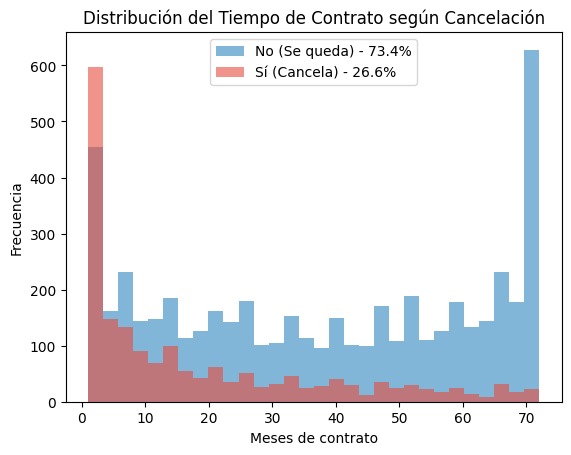

In [49]:
import matplotlib.pyplot as plt

tiempo_si = df[df['Churn'] == 'Sí']['tiempo_contrato']
tiempo_no = df[df['Churn'] == 'No']['tiempo_contrato']

total = len(df)
pct_si = len(tiempo_si) / total * 100
pct_no = len(tiempo_no) / total * 100

plt.figure()

plt.hist(tiempo_no, bins=30, alpha=0.6, label=f'No (Se queda) - {pct_no:.1f}%', color='#2E86C1')
plt.hist(tiempo_si, bins=30, alpha=0.6, label=f'Sí (Cancela) - {pct_si:.1f}%', color='#E74C3C')

plt.title('Distribución del Tiempo de Contrato según Cancelación')
plt.xlabel('Meses de contrato')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()



# Análisis de correlación entre variables

In [50]:
df['churn_num'] = df['Churn'].map({'Sí': 1, 'No': 0})


In [51]:
servicios_cols = [
    'seguridad_online', 'backup_online', 'proteccion_dispositivo',
    'soporte_tecnico', 'streaming_tv', 'streaming_peliculas'
]

# Contar cuántos servicios "Sí" tiene cada cliente
df['cantidad_servicios'] = (df[servicios_cols] == 'Sí').sum(axis=1)


In [52]:
vars_corr = df[[
    'churn_num',
    'tiempo_contrato',
    'valor_mensal',
    'total_cobrado',
    'cuentas_diarias',
    'cantidad_servicios'
]]

vars_corr.head()


,churn_num,tiempo_contrato,valor_mensal,total_cobrado,cuentas_diarias,cantidad_servicios
0,0,9,65.6,593.30,2.186667,3
1,0,9,59.9,542.40,1.996667,1
2,1,4,73.9,280.85,2.463333,1
3,1,13,98.0,1237.85,3.266667,4
4,1,3,83.9,267.40,2.796667,2


In [53]:
corr = vars_corr.corr()
corr


,churn_num,tiempo_contrato,valor_mensal,total_cobrado,cuentas_diarias,cantidad_servicios
churn_num,1.000000,-0.354049,0.192858,-0.199484,0.192858,-0.087882
tiempo_contrato,-0.354049,1.000000,0.246862,0.825880,0.246862,0.495318
valor_mensal,0.192858,0.246862,1.000000,0.651065,1.000000,0.724768
total_cobrado,-0.199484,0.825880,0.651065,1.000000,0.651065,0.746101
cuentas_diarias,0.192858,0.246862,1.000000,0.651065,1.000000,0.724768
cantidad_servicios,-0.087882,0.495318,0.724768,0.746101,0.724768,1.000000


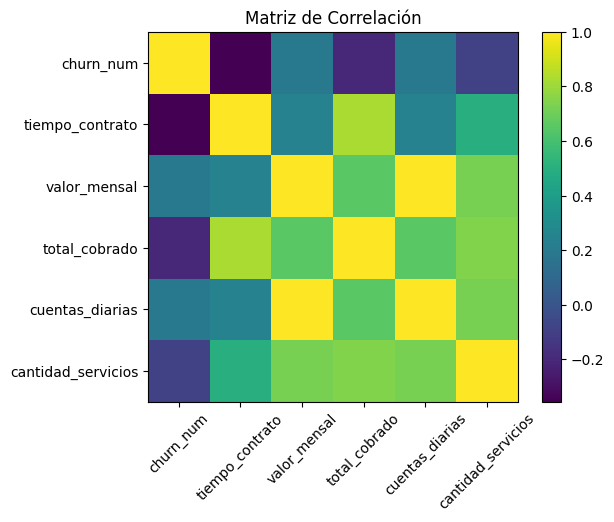

In [54]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Matriz de Correlación')
plt.show()


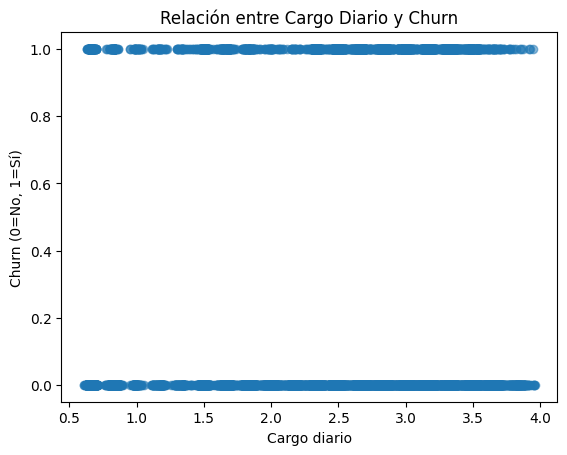

In [55]:
plt.figure()
plt.scatter(df['cuentas_diarias'], df['churn_num'], alpha=0.5)
plt.title('Relación entre Cargo Diario y Churn')
plt.xlabel('Cargo diario')
plt.ylabel('Churn (0=No, 1=Sí)')
plt.show()


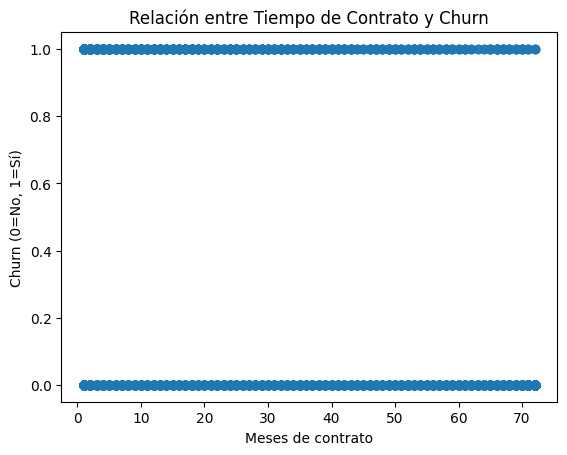

In [56]:
plt.figure()
plt.scatter(df['tiempo_contrato'], df['churn_num'], alpha=0.5)
plt.title('Relación entre Tiempo de Contrato y Churn')
plt.xlabel('Meses de contrato')
plt.ylabel('Churn (0=No, 1=Sí)')
plt.show()


#📄Informe final

## 1. Introducción

Telecom X enfrenta un problema significativo de evasión de clientes (Churn), entendido como la cancelación del servicio por parte del cliente. La pérdida de clientes no solo afecta los ingresos actuales, sino que incrementa los costos de adquisición de nuevos usuarios y reduce la estabilidad del negocio.


El objetivo de este análisis es:
*   Explorar y comprender los datos proporcionados por la empresa.
*   Identificar patrones y factores asociados a la cancelación del servicio.
*   Generar insights accionables que permitan diseñar estrategias para reducir la evasión.
*   Dejar el dataset listo para un futuro modelo predictivo.





## 2. Limpieza y tratamiento de datos



### 2.1 Extracción y normalización

Los datos fueron obtenidos desde una API en formato JSON.

Debido a que el JSON estaba anidado, se realizó un proceso de normalización para convertirlo en una estructura tabular plana, integrando información de:
*   Cliente
*   Servicios de internet y telefonía
*   Cuenta y facturación










### 2.2 Limpieza y estandarización

Se realizaron los siguientes pasos:


1.   Revisión de los siguientes puntos:
     *   Valores nulos
     *   Valores vacíos (incluyendo strings con espacios)
     *   Tipos de datos incorrectos
     *   Inconsistencias en categorías


2.   Renombrar columnas para mejorar legibilidad (genero, tipo_contrato, metodo_pago, valor_mensal, total_cobrado, etc.).


3.   Traducción de valores categóricos al español:  
     *   Churn: Yes/No → Sí/No
     *   genero: Female/Male → Femenino/Masculino
     *   Servicios: Yes/No/No internet service → Sí/No/Sin servicio de internet
     *   Método de pago y tipo de contrato completamente traducidos.


4.   Unificación de categorías para evitar duplicidades semánticas.

5.   Creación de una variable derivada:
     *   Cuentas_Diarias = valor_mensal / 30, para analizar el costo en escala diaria.


***Resultado:*** Se obtuvo un dataset limpio, consistente, comprensible y apto para análisis exploratorio y modelado.

## 3. Análisis exploratorio de datos

### 3.1 Distribución de la evasión

Se analizó la distribución de clientes que:

   *   Cancelaron (Sí)
   *   Permanecen activos (No)


Mediante gráficos de barras y pastel se observó que una proporción relevante de clientes está cancelando, confirmando que la evasión es un problema real y significativo para la empresa.

### 3.2 Evasión por variables categóricas

3.2.1 Tipo de contrato (hallazgo más importante)

Resultados reales obtenidos:

| Tipo de contrato | No (se queda) | Sí (cancela) |
| ---------------- | ------------- | ------------ |
| **Anual**        | 88.72%        | 11.28%       |
| **Bienal**       | 97.15%        | 2.85%        |
| **Mensual**      | 57.29%        | 42.71%       |


***Interpretación:***

- El 42.71% de los clientes con contrato mensual cancelan → casi 1 de cada 2.

- El contrato anual tiene un churn moderado (11.28%).

- El contrato bienal es extremadamente estable (solo 2.85% cancela).

***Conclusión clave:***
El principal motor del churn en Telecom X es el contrato mensual.

3.2.2 Tipo de internet

Resultados reales:

| Tipo de Internet | No    | Sí    |
| ---------------- | ----- | ----- |
| DSL              | 81.0% | 19.0% |
| Fibra óptica     | 58.1% | 41.9% |
| Sin internet     | 92.6% | 7.4%  |


**Interpretación:**

- Los clientes con fibra óptica presentan una tasa de cancelación del 41.9%, extremadamente alta.

- DSL tiene un churn moderado (19%).

- Los clientes sin internet casi no cancelan (7.4%).

***Conclusión:***
La fibra óptica es el segundo gran foco del problema de evasión.

3.2.3 Método de pago y otros servicios

Se observaron diferencias importantes entre métodos de pago, donde ciertos métodos (como cheque electrónico) concentran más cancelaciones, lo cual sugiere:

- Posible fricción en el proceso de cobro

- Correlación con perfiles de clientes más inestables

### 3.3 Evasión por variables numéricas

Se compararon clientes que cancelan vs los que permanecen usando:
- tiempo_contrato
- valor_mensal
- total_cobrado
- Cuentas_Diarias


Para ello se utilizaron diferentes herramientas:
- Estadísticas descriptivas
- Histogramas comparativos
- Boxplots

**Patrones observados:**

1.  Tiempo de contrato:

  - Los clientes que cancelan tienen mucha menor antigüedad.
  - El churn se concentra en clientes nuevos.

2.  Costo mensual y diario:

   - Los clientes que cancelan tienden a tener planes más caros.

3.  Total cobrado:

   -  Es mayor en quienes permanecen, principalmente porque llevan más tiempo en la empresa.

***Conclusión:***
El churn ocurre principalmente en clientes nuevos y con planes más caros.

### 3.4 Análisis de correlación

Se creó una variable numérica churn_num y se analizaron correlaciones con:

- tiempo_contrato

- valor_mensal

- Cuentas_Diarias

- cantidad_servicios

***Resultados:***

1. Correlación negativa entre tiempo_contrato y churn:

2. A más antigüedad, menor probabilidad de cancelar.

3. Correlación positiva entre costo (mensual/diario) y churn:

4. A mayor precio, mayor probabilidad de cancelar.

## 4. Conclusiones e insights

1. El contrato mensual es el principal causante del churn.
    *   Casi el 43% de esos clientes cancela.


2. La fibra óptica es el servicio con mayor evasión.
   *   Con casi 42% de churn, es un foco crítico de revisión.


3. Los clientes nuevos son los más propensos a irse.
   *   La cancelación ocurre principalmente en los primeros meses.

4. El precio importa.
   *   Los clientes con planes más caros tienden a cancelar más.




 ***Perfil de riesgo crítico:***

**Cliente nuevo + contrato mensual + fibra óptica + plan caro.**

## 5. Recomendaciones estratégicas

5.1 Reducir churn en contratos mensuales debe de ser como **prioridad**

1. Incentivar migración a contratos: Pueden ser anules o semestrales

2. Ofrecer: descuentos por permanencia, beneficios adicionales y/o bundles de servicios


5.2 Intervención temprana (primeros 3 a 6 meses)

1. Programas de onboarding

2. Seguimiento proactivo a clientes nuevos

3. Ofertas personalizadas si tienen plan caro

5.3 Revisar servicio de fibra óptica

1. Auditar: la calidad, la estabilidad y el soporte técnico.

2. Revisar si el precio corresponde al valor percibido y las expectativas vs servicio real.

5.4 Estrategia de precios y valor

1. Usar Cuentas_Diarias como indicador de sensibilidad al precio.

2. Diseñar planes escalonados o promociones para clientes con mayor costo.

5.5 Optimizar métodos de pago

1. Incentivar pagos automáticos

2. Reducir fricción en métodos asociados a mayor churn